# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate dataset

In [2]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)
df = pd.DataFrame({'X': x[:, 0], 'Y': y[:, 0]})
df

,X,Y
0,0.548814,4.324257
1,0.715189,4.415576
2,0.602763,4.543484
3,0.544883,4.596838
4,0.423655,3.519718
...,...,...
95,0.183191,3.040033
96,0.586513,3.986953
97,0.020108,2.314679
98,0.828940,4.544849


In [3]:
# Initializing our inputs and outputs as numpy ndarray
X = df['X'].values
Y = df['Y'].values

# Total number of values
N = len(X)
X, Y

(array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
        0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152,
        0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606,
        0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215,
        0.97861834, 0.79915856, 0.46147936, 0.78052918, 0.11827443,
        0.63992102, 0.14335329, 0.94466892, 0.52184832, 0.41466194,
        0.26455561, 0.77423369, 0.45615033, 0.56843395, 0.0187898 ,
        0.6176355 , 0.61209572, 0.616934  , 0.94374808, 0.6818203 ,
        0.3595079 , 0.43703195, 0.6976312 , 0.06022547, 0.66676672,
        0.67063787, 0.21038256, 0.1289263 , 0.31542835, 0.36371077,
        0.57019677, 0.43860151, 0.98837384, 0.10204481, 0.20887676,
        0.16130952, 0.65310833, 0.2532916 , 0.46631077, 0.24442559,
        0.15896958, 0.11037514, 0.65632959, 0.13818295, 0.19658236,
        0.36872517, 0.82099323, 0.09710128, 0.83794491, 0.09609841,
        0.97645947, 0.4686512 , 0.97676109, 0.60

# Prepare values for calculation

In [4]:
# Sum of product of X and Y
df['X*Y'] = df['X'] * df['Y']
XY_sum = df['X*Y'].sum()

# Sum of squared X
df['X^2'] = df['X'] ** 2
X_sum_squared = df['X^2'].sum()

df

,X,Y,X*Y,X^2
0,0.548814,4.324257,2.373211,0.301196
1,0.715189,4.415576,3.157973,0.511496
2,0.602763,4.543484,2.738646,0.363324
3,0.544883,4.596838,2.504740,0.296898
4,0.423655,3.519718,1.491145,0.179483
...,...,...,...,...
95,0.183191,3.040033,0.556908,0.033559
96,0.586513,3.986953,2.338400,0.343997
97,0.020108,2.314679,0.046543,0.000404
98,0.828940,4.544849,3.767407,0.687142


# Calculate coeficients

In [6]:
# Mean of our inputs and outputs
X_mean = np.mean(X)
Y_mean = np.mean(Y)

# X mean squared
X_mean_squared = X_mean ** 2

# Coefficient a and b
b1 = (XY_sum - N * X_mean * Y_mean) / (X_sum_squared - N * X_mean_squared)
b0 = Y_mean - (b1 * X_mean)
X_max = np.max(X)
X_min = np.min(X)

# Plot data

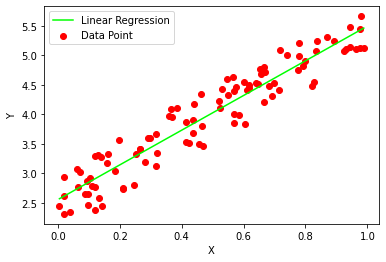

In [7]:
x = np.linspace(X_min, X_max, 100)  # calculating line values of x and y: generate evenly spaced numbers
y = b0 + b1 * x
plt.plot(x, y, color='#00ff00', label='Linear Regression')  # plotting line
plt.scatter(X, Y, color='#ff0000', label='Data Point')  # plot the data point
plt.xlabel('X')  # x-axis label
plt.ylabel('Y')  # y-axis label
plt.legend()
plt.show()

# Measure accuracy

In [8]:
MSE = 0
for i in range(N):
    y_pred = b0 + b1 * X[i]
    MSE += (Y[i] - y_pred) ** 2
MSE = (MSE / N)*100
print("Mean squared error is equal to : {} %".format(round(MSE,2)))

Mean squared error is equal to : 7.62 %


In [12]:
RMSE = np.sqrt(MSE)
print("Root squared error is equal to : {} %".format(round(RMSE,2)))

Root squared error is equal to : 2.76 %


In [13]:
sum_of_squares = 0
sum_of_residuals = 0
for i in range(N):
    y_pred = b0 + b1 * X[i]
    sum_of_squares += (Y[i] - Y_mean) ** 2
    sum_of_residuals += (Y[i] - y_pred) ** 2
score = 1 - (sum_of_residuals / sum_of_squares)


print("R2 is equal to : {} ".format(round(score,2)))

R2 is equal to : 0.9 


In [15]:
print("Coefficient b0: {0} and b1: {1}".format(b0, b1))

Coefficient b0: 2.558080024157022 and b1: 2.936551060203767
